<a href="https://colab.research.google.com/github/jiyuua/MHC-Datathon-2025/blob/akram/MTA_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df  = pd.read_csv("/content/MTA_Bus_Automated_Camera_Enforcement_Violations__Beginning_October_2019_20250921.csv")

In [3]:
df.head()

,Violation ID,Vehicle ID,First Occurrence,Last Occurrence,Violation Status,Violation Type,Bus Route ID,Violation Latitude,Violation Longitude,Stop ID,Stop Name,Bus Stop Latitude,Bus Stop Longitude,Violation Georeference,Bus Stop Georeference
0,489744714,df9044acf85cf55488aea4cd3ce1d0e17ef050551726b6...,08/20/2025 11:48:59 PM,08/20/2025 11:54:47 PM,EXEMPT - BUS/PARATRANSIT,MOBILE BUS STOP,BX28,40.874017,-73.890646,100080,PAUL AV/BEDFORD PARK BLVD,40.874629,-73.891539,POINT (-73.890646 40.874017),POINT (-73.891539 40.874629)
1,489741945,3f877f70d9b253515a945be807c9c62d5814949f810310...,08/20/2025 10:50:45 PM,08/20/2025 11:32:43 PM,EXEMPT - OTHER,MOBILE BUS STOP,Q44+,40.762529,-73.831728,501140,UNION ST/35 AV,40.765422,-73.827944,POINT (-73.831728 40.762529),POINT (-73.827944 40.765422)
2,489741940,7feac037b62d591ffb1214e356157f3dd197fc22fee5bb...,08/20/2025 10:52:57 AM,08/20/2025 11:16:57 AM,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS STOP,M101,40.815113,-73.955040,401458,AMSTERDAM AV/W 131 ST,40.816009,-73.954424,POINT (-73.95504 40.815113),POINT (-73.954424 40.816009)
3,489741935,e9122b4e6dac9160ed4fca952a3815fe4c737bfc70cb97...,08/20/2025 11:35:29 PM,08/20/2025 11:39:32 PM,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS STOP,M101,40.795630,-73.941683,402704,3 AV/E 109 ST,40.793765,-73.943005,POINT (-73.941683 40.79563),POINT (-73.943005 40.793765)
4,489741885,f8f5cc735e84092b5cd07a0a19e39251d551d561afa5eb...,08/20/2025 10:44:38 PM,08/20/2025 11:39:04 PM,EXEMPT - BUS/PARATRANSIT,MOBILE BUS STOP,B46+,40.668480,-73.931146,303672,MALCOLM X BLVD/FULTON ST,40.679421,-73.929000,POINT (-73.931146 40.66848),POINT (-73.929 40.679421)


In [4]:
df.describe()

,Violation ID,Violation Latitude,Violation Longitude,Stop ID,Bus Stop Latitude,Bus Stop Longitude
count,7.690670e+05,769067.000000,769067.000000,769067.000000,769067.000000,769066.000000
mean,4.512237e+08,40.767281,-73.924151,349529.465320,40.767679,-73.923919
std,2.769195e+07,0.073730,0.053925,190879.113491,0.074051,0.054218
min,3.529635e+08,40.534458,-74.184422,100017.000000,40.534540,-74.191752
25%,4.400554e+08,40.709987,-73.960019,104556.000000,40.708881,-73.959575
50%,4.553733e+08,40.777703,-73.936298,401779.000000,40.778463,-73.935267
75%,4.708689e+08,40.828730,-73.892132,404995.000000,40.830102,-73.891857
max,4.897447e+08,40.881059,-73.701066,984012.000000,40.880732,-73.701373


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769067 entries, 0 to 769066
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Violation ID            769067 non-null  int64  
 1   Vehicle ID              768964 non-null  object 
 2   First Occurrence        769067 non-null  object 
 3   Last Occurrence         769067 non-null  object 
 4   Violation Status        769067 non-null  object 
 5   Violation Type          769067 non-null  object 
 6   Bus Route ID            769067 non-null  object 
 7   Violation Latitude      769067 non-null  float64
 8   Violation Longitude     769067 non-null  float64
 9   Stop ID                 769067 non-null  int64  
 10  Stop Name               769067 non-null  object 
 11  Bus Stop Latitude       769067 non-null  float64
 12  Bus Stop Longitude      769066 non-null  float64
 13  Violation Georeference  769066 non-null  object 
 14  Bus Stop Georeferenc

In [6]:
df.isnull().sum()

,0
Violation ID,0
Vehicle ID,103
First Occurrence,0
Last Occurrence,0
Violation Status,0
Violation Type,0
Bus Route ID,0
Violation Latitude,0
Violation Longitude,0
Stop ID,0


We will drop those null Bus Route ID columns for now but in the future, perhaps it will be possible to figure out the Bus ID based on the other features.

In [7]:
df = df.dropna(subset=['Bus Route ID'])

We will be focusing on Manhattan for the time being

In [8]:
df['Bus Route ID'].unique()

array(['BX28', 'Q44+', 'M101', 'B46+', 'Q69', 'BX36', 'BX38', 'M42',
       'M60+', 'M2', 'B35', 'BX35', 'B82+', 'M34+', 'M15+', 'BX19',
       'Q53+', 'BX41+', 'M23+', 'M100', 'BX12+', 'Q43', 'Q54', 'B44+',
       'B41', 'Q58', 'M4', 'B25', 'BX6+', 'B62', 'M79+', 'M86+', 'B26',
       'M14+', 'B42', 'Q5', 'S79+', 'BX28-BX38', 'S46', 'BX5'],
      dtype=object)

This was to check for if the Q32 was inside this dataframe as it is the only non "M" bus to have routes in Manhattan, since it's not narrowing it down to just the Manhattan buses is very easy.

In [9]:
df_manhattan = df[df['Bus Route ID'].str.contains('M')]

In [10]:
df_manhattan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292904 entries, 2 to 769065
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Violation ID            292904 non-null  int64  
 1   Vehicle ID              292825 non-null  object 
 2   First Occurrence        292904 non-null  object 
 3   Last Occurrence         292904 non-null  object 
 4   Violation Status        292904 non-null  object 
 5   Violation Type          292904 non-null  object 
 6   Bus Route ID            292904 non-null  object 
 7   Violation Latitude      292904 non-null  float64
 8   Violation Longitude     292904 non-null  float64
 9   Stop ID                 292904 non-null  int64  
 10  Stop Name               292904 non-null  object 
 11  Bus Stop Latitude       292904 non-null  float64
 12  Bus Stop Longitude      292904 non-null  float64
 13  Violation Georeference  292904 non-null  object 
 14  Bus Stop Georeference   2

In [11]:
df_manhattan['Bus Route ID'].unique()

array(['M101', 'M42', 'M60+', 'M2', 'M34+', 'M15+', 'M23+', 'M100', 'M4',
       'M79+', 'M86+', 'M14+'], dtype=object)

In [12]:
df_manhattan.isnull().sum()

,0
Violation ID,0
Vehicle ID,79
First Occurrence,0
Last Occurrence,0
Violation Status,0
Violation Type,0
Bus Route ID,0
Violation Latitude,0
Violation Longitude,0
Stop ID,0


In [13]:
df_manhattan['Violation Status'].unique()

array(['EXEMPT - EMERGENCY VEHICLE', 'EXEMPT - BUS/PARATRANSIT',
       'EXEMPT - OTHER', 'EXEMPT - COMMERCIAL UNDER 20'], dtype=object)

<Axes: title={'center': 'Exempt Vehicle Count'}, xlabel='Exempt Vehicle Type', ylabel='Count'>

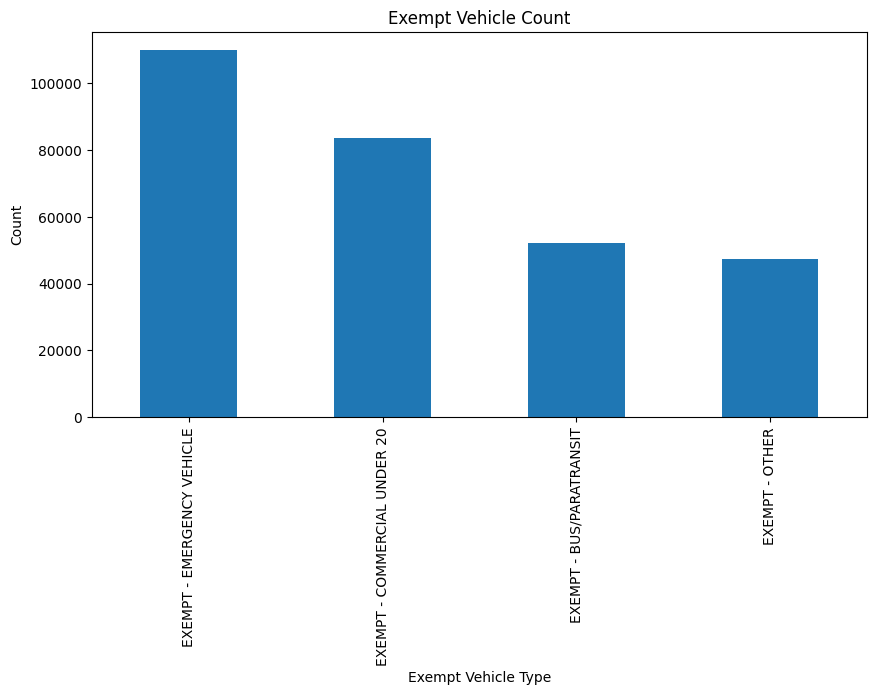

In [14]:
df_manhattan['Violation Status'].value_counts().plot(kind='bar',figsize=(10,5),title='Exempt Vehicle Count',ylabel='Count',xlabel='Exempt Vehicle Type')

In [15]:
df_manhattan['Violation Status'].value_counts()/df_manhattan['Violation Status'].value_counts().sum()

,count
Violation Status,
EXEMPT - EMERGENCY VEHICLE,0.374997
EXEMPT - COMMERCIAL UNDER 20,0.285517
EXEMPT - BUS/PARATRANSIT,0.178144
EXEMPT - OTHER,0.161343


In [16]:
'''plt.figure(figsize=(10,8))
sns.kdeplot(
    x=df_manhattan["Bus Stop Longitude"], y=df_manhattan["Bus Stop Latitude"],
    fill=True, cmap="Reds", levels=50, thresh=0.05
)
sns.scatterplot(
    x=df_manhattan["Bus Stop Longitude"], y=df_manhattan["Bus Stop Latitude"],
    hue=df_manhattan["Violation Status"], alpha=0.6, edgecolor=None
)
plt.title("Violation Status Heatmap")
plt.show()'''


'plt.figure(figsize=(10,8))\nsns.kdeplot(\n    x=df_manhattan["Bus Stop Longitude"], y=df_manhattan["Bus Stop Latitude"],\n    fill=True, cmap="Reds", levels=50, thresh=0.05\n)\nsns.scatterplot(\n    x=df_manhattan["Bus Stop Longitude"], y=df_manhattan["Bus Stop Latitude"],\n    hue=df_manhattan["Violation Status"], alpha=0.6, edgecolor=None\n)\nplt.title("Violation Status Heatmap")\nplt.show()'

In [16]:
agg = (
    df_manhattan.groupby(["Bus Stop Latitude", "Bus Stop Longitude"])["Violation Status"]
      .agg(lambda x: x.mode()[0])
      .reset_index()
)
agg["count"] = df_manhattan.groupby(["Bus Stop Latitude", "Bus Stop Longitude"]).size().values

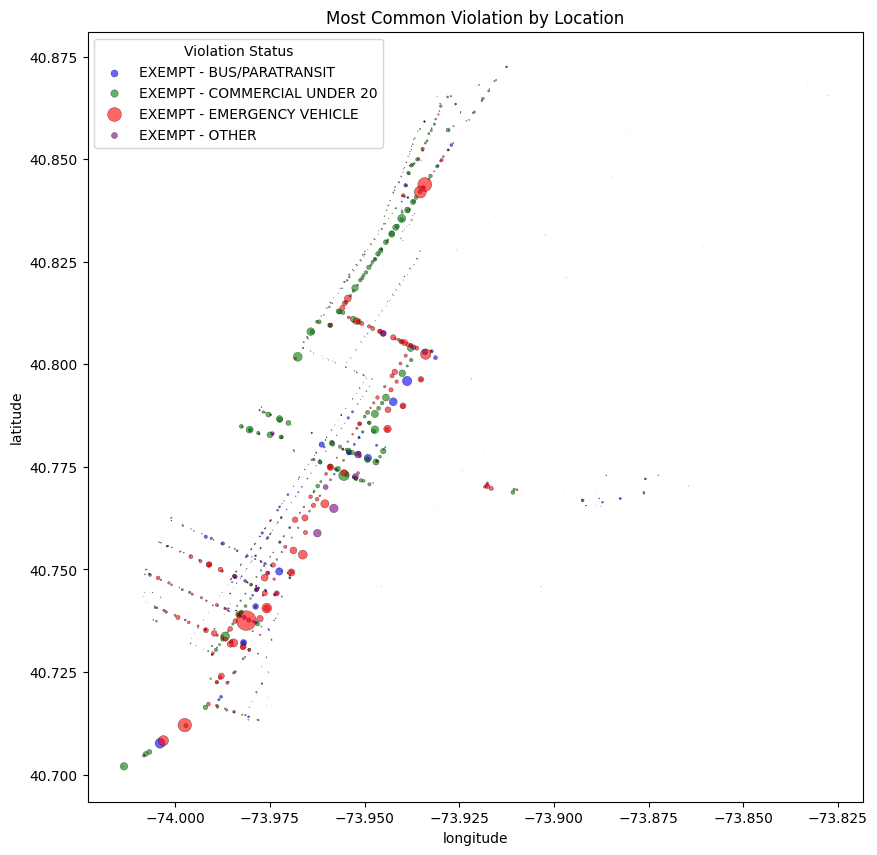

In [17]:
status_color = {
    "EXEMPT - EMERGENCY VEHICLE": "red",
    "EXEMPT - BUS/PARATRANSIT": "blue",
    "EXEMPT - COMMERCIAL UNDER 20": "green",
    "EXEMPT - OTHER" : "purple"
}

plt.figure(figsize=(10,10))
for status, group in agg.groupby("Violation Status"):
    plt.scatter(
        group["Bus Stop Longitude"], group["Bus Stop Latitude"],
        s=(group["count"]/agg["count"].max())*200,
        c=status_color[status],
        label=status,
        alpha=0.6, edgecolor="k", linewidth=0.3
    )

plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("Most Common Violation by Location")
plt.legend(title="Violation Status")
plt.show()


In [18]:
import folium

m = folium.Map(location=[40.75, -73.98], zoom_start=12, tiles="cartodbpositron")
status_color = {
    "EXEMPT - BUS/PARATRANSIT": "blue",
    "EXEMPT - COMMERCIAL UNDER 20": "green",
    "EXEMPT - EMERGENCY VEHICLE": "red",
    "EXEMPT - OTHER": "purple"
}

for _, row in agg.iterrows():
    folium.CircleMarker(
        location=[row["Bus Stop Latitude"], row["Bus Stop Longitude"]],
        radius=(row["count"]/agg["count"].max())*10,  # scale size
        color=status_color.get(row["Violation Status"], "gray"),
        fill=True, fill_opacity=0.6,
        popup=f"{row['Violation Status']} ({row['count']} violations)"
    ).add_to(m)

In [19]:
from IPython.display import display

display(m)


There seems to be a noticeably dense patch at 2nd Ave between East 22nd and 23rd Street made up by emergency vehicles.

Along with those two streets East 14th St, 3rd Ave, and Lexington Ave seem to have a consistent pattern/stream of emergency vehicles tagged.

Madison Ave, 5th Ave, and West 42nd St seem to have a consistent pattern of bus/paratransit vehicles tagged

Amsterdam Ave and Broadway seem to be dominated by mostly commercial vehicles

Now let's see if congestion pricing has played any significant role with these exempt vehicles

In [20]:
df_manhattan_copy = df_manhattan.copy()

In [21]:
df_manhattan_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292904 entries, 2 to 769065
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Violation ID            292904 non-null  int64  
 1   Vehicle ID              292825 non-null  object 
 2   First Occurrence        292904 non-null  object 
 3   Last Occurrence         292904 non-null  object 
 4   Violation Status        292904 non-null  object 
 5   Violation Type          292904 non-null  object 
 6   Bus Route ID            292904 non-null  object 
 7   Violation Latitude      292904 non-null  float64
 8   Violation Longitude     292904 non-null  float64
 9   Stop ID                 292904 non-null  int64  
 10  Stop Name               292904 non-null  object 
 11  Bus Stop Latitude       292904 non-null  float64
 12  Bus Stop Longitude      292904 non-null  float64
 13  Violation Georeference  292904 non-null  object 
 14  Bus Stop Georeference   2

In [22]:
df_manhattan_copy['First Occurrence'] = pd.to_datetime(df_manhattan_copy['First Occurrence'])

In [23]:
df_manhattan_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292904 entries, 2 to 769065
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Violation ID            292904 non-null  int64         
 1   Vehicle ID              292825 non-null  object        
 2   First Occurrence        292904 non-null  datetime64[ns]
 3   Last Occurrence         292904 non-null  object        
 4   Violation Status        292904 non-null  object        
 5   Violation Type          292904 non-null  object        
 6   Bus Route ID            292904 non-null  object        
 7   Violation Latitude      292904 non-null  float64       
 8   Violation Longitude     292904 non-null  float64       
 9   Stop ID                 292904 non-null  int64         
 10  Stop Name               292904 non-null  object        
 11  Bus Stop Latitude       292904 non-null  float64       
 12  Bus Stop Longitude      292904 non-

In [24]:
cutoff_congestion = pd.Timestamp('2025-01-05')

In [25]:
df_pre_congestion = df_manhattan_copy[df_manhattan_copy['First Occurrence'] < cutoff_congestion]
df_post_congestion = df_manhattan_copy[df_manhattan_copy['First Occurrence'] >= cutoff_congestion]

In [26]:
df_pre_congestion.head()

,Violation ID,Vehicle ID,First Occurrence,Last Occurrence,Violation Status,Violation Type,Bus Route ID,Violation Latitude,Violation Longitude,Stop ID,Stop Name,Bus Stop Latitude,Bus Stop Longitude,Violation Georeference,Bus Stop Georeference
414820,453199364,21944709e605608ed8c5467b85d101f1d35aa589850cc1...,2025-01-04 13:19:59,01/04/2025 02:15:28 PM,EXEMPT - COMMERCIAL UNDER 20,MOBILE DOUBLE PARKED,M101,40.798618,-73.939526,405181,3 AV/E 116 ST,40.797798,-73.940040,POINT (-73.939526 40.798618),POINT (-73.94004 40.797798)
416888,453072207,f93011fc8c292c59f5695beb5de638ef17d159b46f274a...,2025-01-03 11:08:49,01/03/2025 11:11:25 AM,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS STOP,M60+,40.807530,-73.945047,405417,W 125 ST/MALCOLM X BLVD,40.807514,-73.945075,POINT (-73.945047 40.80753),POINT (-73.945075 40.807514)
418457,452953656,421d84e2d1638a96cad98d531e96b5c9d5406dfc443b63...,2025-01-03 06:53:46,01/03/2025 07:23:53 AM,EXEMPT - EMERGENCY VEHICLE,MOBILE DOUBLE PARKED,M101,40.842347,-73.935115,402740,AMSTERDAM AV/W 171 ST,40.841978,-73.935267,POINT (-73.935115 40.842347),POINT (-73.935267 40.841978)
419147,452936924,342be3020cde877d828ea8e68820a26f81379c63eddc15...,2025-01-04 21:35:23,01/04/2025 09:39:56 PM,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS STOP,M14+,40.737463,-73.997005,403894,W 14 ST/5 AV,40.736229,-73.993956,POINT (-73.997005 40.737463),POINT (-73.993956 40.736229)
419364,452933077,24cd05848f1bad0a7b5c883947d17f999ef951dfd9b566...,2025-01-04 10:24:04,01/04/2025 10:36:29 AM,EXEMPT - OTHER,MOBILE DOUBLE PARKED,M101,40.830274,-73.943932,402639,AMSTERDAM AV/W 156 ST,40.831932,-73.942813,POINT (-73.943932 40.830274),POINT (-73.942813 40.831932)


In [27]:
df_pre_congestion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123358 entries, 414820 to 769065
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Violation ID            123358 non-null  int64         
 1   Vehicle ID              123290 non-null  object        
 2   First Occurrence        123358 non-null  datetime64[ns]
 3   Last Occurrence         123358 non-null  object        
 4   Violation Status        123358 non-null  object        
 5   Violation Type          123358 non-null  object        
 6   Bus Route ID            123358 non-null  object        
 7   Violation Latitude      123358 non-null  float64       
 8   Violation Longitude     123358 non-null  float64       
 9   Stop ID                 123358 non-null  int64         
 10  Stop Name               123358 non-null  object        
 11  Bus Stop Latitude       123358 non-null  float64       
 12  Bus Stop Longitude      123358

In [28]:
df_post_congestion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169546 entries, 2 to 421356
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Violation ID            169546 non-null  int64         
 1   Vehicle ID              169535 non-null  object        
 2   First Occurrence        169546 non-null  datetime64[ns]
 3   Last Occurrence         169546 non-null  object        
 4   Violation Status        169546 non-null  object        
 5   Violation Type          169546 non-null  object        
 6   Bus Route ID            169546 non-null  object        
 7   Violation Latitude      169546 non-null  float64       
 8   Violation Longitude     169546 non-null  float64       
 9   Stop ID                 169546 non-null  int64         
 10  Stop Name               169546 non-null  object        
 11  Bus Stop Latitude       169546 non-null  float64       
 12  Bus Stop Longitude      169546 non-

<Axes: title={'center': 'Exempt Vehicle Count Pre Congestion Pricing'}, xlabel='Exempt Vehicle Type', ylabel='Count'>

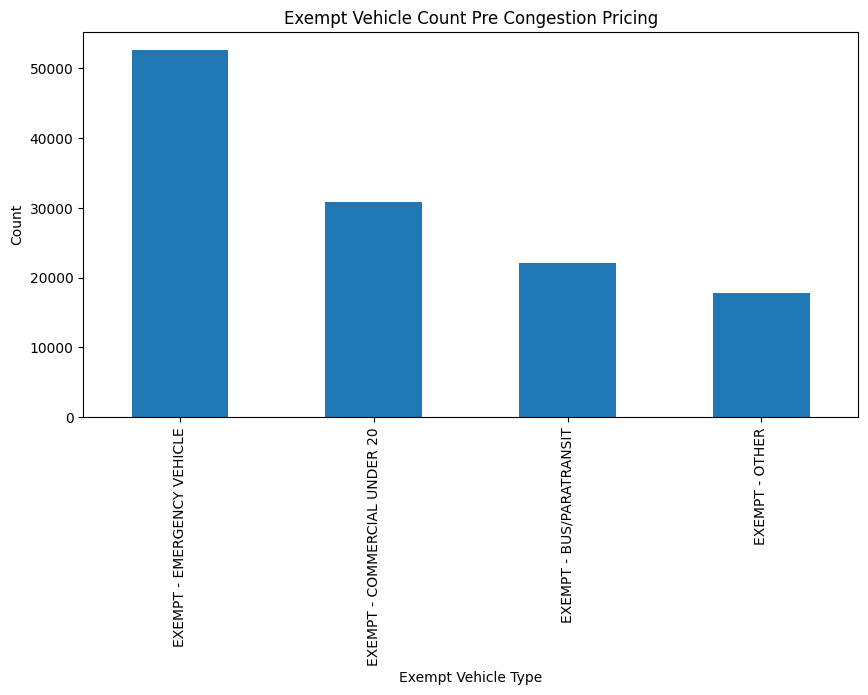

In [29]:
df_pre_congestion['Violation Status'].value_counts().plot(kind='bar',figsize=(10,5),title='Exempt Vehicle Count Pre Congestion Pricing',ylabel='Count',xlabel='Exempt Vehicle Type')

In [30]:
df_pre_congestion['Violation Status'].value_counts()/df_pre_congestion['Violation Status'].value_counts().sum()

,count
Violation Status,
EXEMPT - EMERGENCY VEHICLE,0.426109
EXEMPT - COMMERCIAL UNDER 20,0.250369
EXEMPT - BUS/PARATRANSIT,0.178732
EXEMPT - OTHER,0.144790


<Axes: title={'center': 'Exempt Vehicle Count Post Congestion Pricing'}, xlabel='Exempt Vehicle Type', ylabel='Count'>

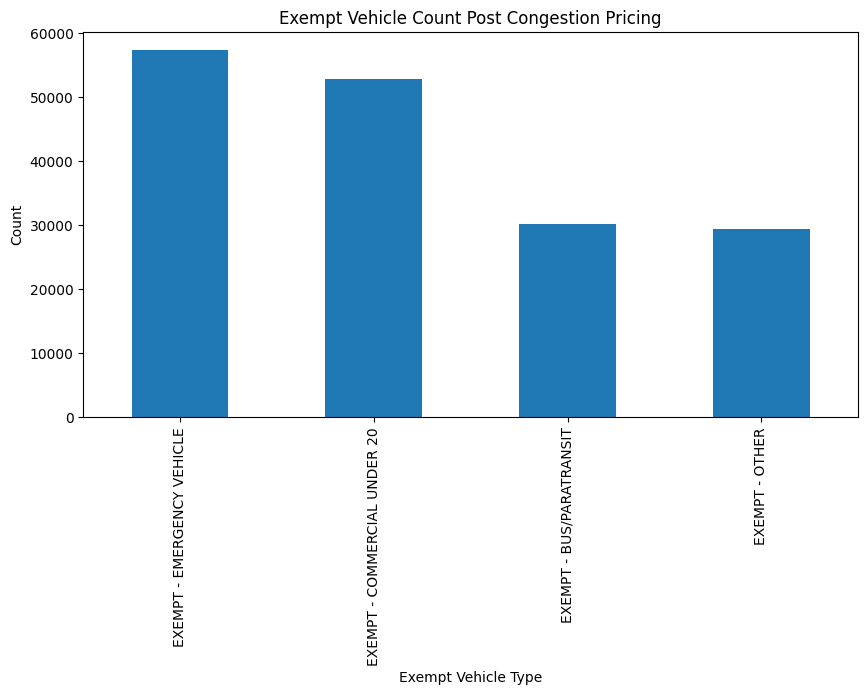

In [31]:
df_post_congestion['Violation Status'].value_counts().plot(kind='bar',figsize=(10,5),title='Exempt Vehicle Count Post Congestion Pricing',ylabel='Count',xlabel='Exempt Vehicle Type')

In [32]:
df_post_congestion['Violation Status'].value_counts()/df_post_congestion['Violation Status'].value_counts().sum()

,count
Violation Status,
EXEMPT - EMERGENCY VEHICLE,0.337808
EXEMPT - COMMERCIAL UNDER 20,0.311090
EXEMPT - BUS/PARATRANSIT,0.177716
EXEMPT - OTHER,0.173387


The ratio for the parantransit and "other" exempt vehicles stayed relatively consistent pre and post congestion pricing

While pre-congestion emergency vehicles were far away in the lead, post-congestion it was much more similar to a 1:1 ratio for emergency vehicles compared to commercial vehicles, each made up about 1/3 of the occurences.

Since we know that congestion pricing was implemented in January 2025, we can figure out the number of exempts that happened on average per month pre and post congestion.

In [33]:
#Earliest date in the data
df_manhattan_copy['First Occurrence'].min()

Timestamp('2023-02-06 06:28:39')

So around 23 months of data for pre-congestion pricing

In [37]:
df_pre_congestion.value_counts().sum()/23

np.float64(5360.434782608696)

So around 5360 violations from exempt vehicles per month pre congestion pricing

In [39]:
#Latest date in the data
df_manhattan_copy['First Occurrence'].max()

Timestamp('2025-08-21 19:09:21')

We've had around 7 months of congestion pricing so far

In [41]:
df_post_congestion['First Occurrence'].min()

Timestamp('2025-01-05 00:08:40')

In [40]:
df_post_congestion.value_counts().sum()/7

np.float64(24219.285714285714)

So around 24219 violations from exempt vehicles per month post congestion pricing.